In [1]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

x, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.7, random_state=0)

mean = MeanShift(bandwidth=0.8)
labels = mean.fit_predict(x)
np.unique(labels)

/home/arti/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


array([0, 1, 2, 3, 4, 5])

In [2]:
mean = MeanShift(bandwidth=1)
labels = mean.fit_predict(x)
np.unique(labels)

array([0, 1, 2])

In [3]:
from sklearn.cluster import estimate_bandwidth

band = estimate_bandwidth(x)
band

1.8158484154517098

In [4]:
import pandas as pd

df = pd.DataFrame(data=x, columns=['f1', 'f2'])
df['target'] = y

mean = MeanShift(bandwidth=band)
labels = mean.fit_predict(x)
np.unique(labels)

/home/arti/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


array([0, 1, 2])

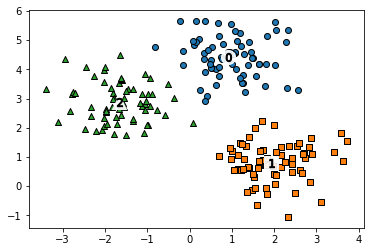

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

df['labels'] = labels
centers = mean.cluster_centers_
uniques = np.unique(labels)
markers = ['o', 's', '^', 'x', '*']

for i in uniques:
    cl = df[df['labels']==i]
    c = centers[i]
    plt.scatter(x=cl['f1'], y=cl['f2'], edgecolor='k', marker=markers[i])
    plt.scatter(x=c[0], y=c[1], s=200, color='white', alpha=0.9, marker=markers[i])
    plt.scatter(x=c[0], y=c[1], s=70, color='k', edgecolor='k', marker='$%d$' % i)
    
plt.show()

In [9]:
df.groupby('target')['labels'].value_counts()

target  labels
0       0         67
1       1         67
2       2         66
Name: labels, dtype: int64